In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [2]:
spec_febTS = xr.open_dataset('curtain_SSH_spectra_barotropic.nc')
X = spec_febTS.X

In [3]:
sns.set_context('talk')

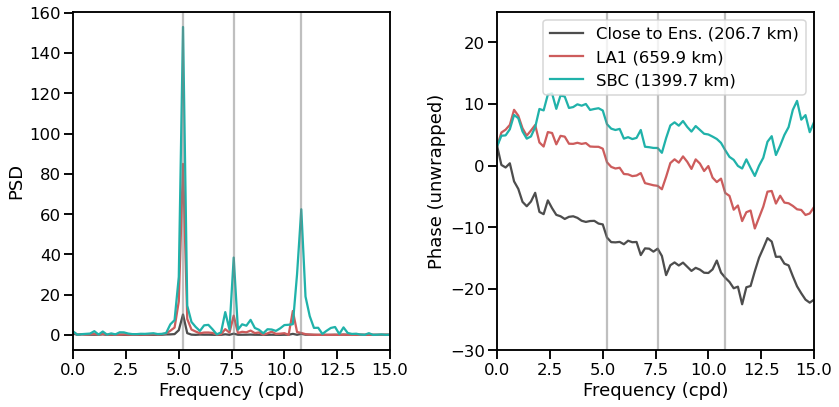

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6), sharex=True)

colors=['0.3','indianred','lightseagreen']

for kk, col, lab in zip([100, 307, 440],colors, ['Close to Ens.','LA1','SBC']):
    ax1.plot(spec_febTS.Freq, spec_febTS.psd_data[kk,:],color=col, 
             label='%s, (%1.1f km)' %(lab,X[kk]))
    ax2.plot(spec_febTS.Freq, np.unwrap(spec_febTS.phase_data[kk,:]),
             color=col,label='%s (%1.1f km)' %(lab,X[kk]))
ax1.axvline(5.2, color='0.5', alpha=0.5)     
ax2.axvline(5.2, color='0.5', alpha=0.5)     
ax1.axvline(7.6, color='0.5', alpha=0.5)     
ax2.axvline(7.6, color='0.5', alpha=0.5)     
ax1.axvline(10.8, color='0.5', alpha=0.5)     
ax2.axvline(10.8, color='0.5', alpha=0.5)     

ax2.legend(ncol=1)
ax1.set_xlim(0,15)
ax2.set_ylim(-30,25)
ax1.set_xlabel('Frequency (cpd)')
ax2.set_xlabel('Frequency (cpd)')
ax1.set_ylabel('PSD')
ax2.set_ylabel('Phase (unwrapped)')
plt.tight_layout()

### Time series comparison

In [11]:
ssh_febTS = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
ssh_febTS_noSVB = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')

ssh_baro = xr.open_dataset('curtain_SSH_SVB_Barotropic.nc')
ssh_baro_noSVB = xr.open_dataset('curtain_SSH_NoSVB_Barotropic.nc')

Text(0, 0.5, 'SSH')

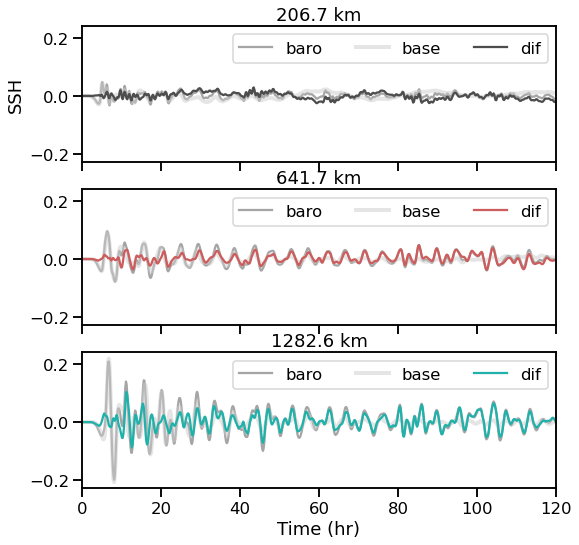

In [30]:
sns.set_context('talk')
fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(8.5, 8.5), sharex=True, sharey=True)

base = ssh_febTS.curtain_data[:]-ssh_febTS_noSVB.curtain_data[:]
baro = ssh_baro.curtain_data[:]-ssh_baro_noSVB.curtain_data[:]

ax1.axhline(0, color='0.5')

for kk, col,axx in zip([100, 300, 420],colors, [ax,ax2,ax3]):
    axx.plot(ssh_febTS.T/3600, (baro[:,kk])*100,color='0.3', label='baro',alpha=0.5)
    axx.plot(ssh_febTS.T/3600, (base[:,kk])*100,color='0.8',label='base',linewidth=4, alpha=0.5)
    axx.plot(ssh_febTS.T/3600, (baro[:,kk]-base[:,kk])*100,color=col,label='dif'  )
    axx.set_title('%1.1f km' %X[kk])  
    axx.legend(ncol=3)
ax.set_xlim(0,24*5)

ax3.set_xlabel('Time (hr)')
ax.set_ylabel('SSH')